In [3]:
pip3 install opencv python matplotlib numpy

SyntaxError: invalid syntax (<ipython-input-3-63771959163e>, line 1)

In [1]:
import cv2

vcapture = cv2.VideoCapture(0) 
while True:
  ret, frame = vcapture.read()
  if ret == True:
    grayscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edge = cv2.Canny(grayscale, 75, 125)
    cv2.imshow('Edge frame', edge)
    if cv2.waitKey(20) == ord('q'):
      break
 
vcapture.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [4]:
# OpenCV program to perform Edge detection in real time 
# import libraries of python OpenCV 
# where its functionality resides 
import cv2 

# np is an alias pointing to numpy library 
import numpy as np 


# capture frames from a camera 
cap = cv2.VideoCapture(0) 


# loop runs if capturing has been initialized 
while(1): 
    # reads frames from a camera 
    ret, frame = cap.read() 
    # converting BGR to HSV 
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 
    
    # define range of red color in HSV 
    lower_red = np.array([30,150,50]) 
    upper_red = np.array([255,255,180]) 

    # create a red HSV colour boundary and 
    # threshold HSV image 
    mask = cv2.inRange(hsv, lower_red, upper_red) 

    # Bitwise-AND mask and original image 
    res = cv2.bitwise_and(frame,frame, mask= mask) 
    # Display an original image 
    cv2.imshow('Original',frame) 
    # finds edges in the input image image and 
    # marks them in the output map edges 
    edges = cv2.Canny(frame,100,200)
    # Display edges in a frame 
    cv2.imshow('Edges',edges) 
    # Wait for Esc key to stop 
    k = cv2.waitKey(5) & 0xFF
    if k == 27: 
        break


# Close the window 
cap.release() 

# De-allocate any associated memory usage 
cv2.destroyAllWindows() 


KeyboardInterrupt: 

In [2]:
pip install Computer_Vision

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import cv2
import argparse

from Computer_Vision.Canny_Edge_Detection.sobel import sobel_edge_detection
from Computer_Vision.Canny_Edge_Detection.gaussian_smoothing import gaussian_blur

import matplotlib.pyplot as plt


def non_max_suppression(gradient_magnitude, gradient_direction, verbose):
    image_row, image_col = gradient_magnitude.shape

    output = np.zeros(gradient_magnitude.shape)

    PI = 180

    for row in range(1, image_row - 1):
        for col in range(1, image_col - 1):
            direction = gradient_direction[row, col]

            if (0 <= direction < PI / 8) or (15 * PI / 8 <= direction <= 2 * PI):
                before_pixel = gradient_magnitude[row, col - 1]
                after_pixel = gradient_magnitude[row, col + 1]

            elif (PI / 8 <= direction < 3 * PI / 8) or (9 * PI / 8 <= direction < 11 * PI / 8):
                before_pixel = gradient_magnitude[row + 1, col - 1]
                after_pixel = gradient_magnitude[row - 1, col + 1]

            elif (3 * PI / 8 <= direction < 5 * PI / 8) or (11 * PI / 8 <= direction < 13 * PI / 8):
                before_pixel = gradient_magnitude[row - 1, col]
                after_pixel = gradient_magnitude[row + 1, col]

            else:
                before_pixel = gradient_magnitude[row - 1, col - 1]
                after_pixel = gradient_magnitude[row + 1, col + 1]

            if gradient_magnitude[row, col] >= before_pixel and gradient_magnitude[row, col] >= after_pixel:
                output[row, col] = gradient_magnitude[row, col]

    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Non Max Suppression")
        plt.show()

    return output


def threshold(image, low, high, weak, verbose=False):
    output = np.zeros(image.shape)

    strong = 255

    strong_row, strong_col = np.where(image >= high)
    weak_row, weak_col = np.where((image <= high) & (image >= low))

    output[strong_row, strong_col] = strong
    output[weak_row, weak_col] = weak

    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("threshold")
        plt.show()

    return output


def hysteresis(image, weak):
    image_row, image_col = image.shape

    top_to_bottom = image.copy()

    for row in range(1, image_row):
        for col in range(1, image_col):
            if top_to_bottom[row, col] == weak:
                if top_to_bottom[row, col + 1] == 255 or top_to_bottom[row, col - 1] == 255 or top_to_bottom[row - 1, col] == 255 or top_to_bottom[
                    row + 1, col] == 255 or top_to_bottom[
                    row - 1, col - 1] == 255 or top_to_bottom[row + 1, col - 1] == 255 or top_to_bottom[row - 1, col + 1] == 255 or top_to_bottom[
                    row + 1, col + 1] == 255:
                    top_to_bottom[row, col] = 255
                else:
                    top_to_bottom[row, col] = 0

    bottom_to_top = image.copy()

    for row in range(image_row - 1, 0, -1):
        for col in range(image_col - 1, 0, -1):
            if bottom_to_top[row, col] == weak:
                if bottom_to_top[row, col + 1] == 255 or bottom_to_top[row, col - 1] == 255 or bottom_to_top[row - 1, col] == 255 or bottom_to_top[
                    row + 1, col] == 255 or bottom_to_top[
                    row - 1, col - 1] == 255 or bottom_to_top[row + 1, col - 1] == 255 or bottom_to_top[row - 1, col + 1] == 255 or bottom_to_top[
                    row + 1, col + 1] == 255:
                    bottom_to_top[row, col] = 255
                else:
                    bottom_to_top[row, col] = 0

    right_to_left = image.copy()

    for row in range(1, image_row):
        for col in range(image_col - 1, 0, -1):
            if right_to_left[row, col] == weak:
                if right_to_left[row, col + 1] == 255 or right_to_left[row, col - 1] == 255 or right_to_left[row - 1, col] == 255 or right_to_left[
                    row + 1, col] == 255 or right_to_left[
                    row - 1, col - 1] == 255 or right_to_left[row + 1, col - 1] == 255 or right_to_left[row - 1, col + 1] == 255 or right_to_left[
                    row + 1, col + 1] == 255:
                    right_to_left[row, col] = 255
                else:
                    right_to_left[row, col] = 0

    left_to_right = image.copy()

    for row in range(image_row - 1, 0, -1):
        for col in range(1, image_col):
            if left_to_right[row, col] == weak:
                if left_to_right[row, col + 1] == 255 or left_to_right[row, col - 1] == 255 or left_to_right[row - 1, col] == 255 or left_to_right[
                    row + 1, col] == 255 or left_to_right[
                    row - 1, col - 1] == 255 or left_to_right[row + 1, col - 1] == 255 or left_to_right[row - 1, col + 1] == 255 or left_to_right[
                    row + 1, col + 1] == 255:
                    left_to_right[row, col] = 255
                else:
                    left_to_right[row, col] = 0

    final_image = top_to_bottom + bottom_to_top + right_to_left + left_to_right

    final_image[final_image > 255] = 255

    return final_image


if __name__ == '__main__':
    ap = argparse.ArgumentParser()
    ap.add_argument("-i", "--image", required=True, help="Path to the image")
    ap.add_argument("-v", "--verbose", type=bool, default=False, help="Path to the image")
    args = vars(ap.parse_args())

    image = cv2.imread(args["image"])

    blurred_image = gaussian_blur(image, kernel_size=9, verbose=False)

    edge_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    gradient_magnitude, gradient_direction = sobel_edge_detection(blurred_image, edge_filter, convert_to_degree=True, verbose=args["verbose"])

    new_image = non_max_suppression(gradient_magnitude, gradient_direction, verbose=args["verbose"])

    weak = 50

    new_image = threshold(new_image, 5, 20, weak=weak, verbose=args["verbose"])

    new_image = hysteresis(new_image, weak)

    plt.imshow(new_image, cmap='gray')
    plt.title("Canny Edge Detector")
    plt.show()

ModuleNotFoundError: No module named 'Computer_Vision'

In [5]:
pip install rect

Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\MANDY\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\MANDY\\AppData\\Local\\Temp\\pip-install-c6g4u74k\\rect\\setup.py'"'"'; __file__='"'"'C:\\Users\\MANDY\\AppData\\Local\\Temp\\pip-install-c6g4u74k\\rect\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base pip-egg-info
         cwd: C:\Users\MANDY\AppData\Local\Temp\pip-install-c6g4u74k\rect\
    Complete output (8 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\MANDY\AppData\Local\Temp\pip-install-c6g4u74k\rect\setup.py", line 1, in <module>
        from ez_setup import use_setuptools
      File "C:\Users\MANDY\AppData\Local\Temp\pip-install-c6g4u74k\rect\ez_setup.py", line 94
        except pkg_resources.VersionCo

In [11]:
import numpy as np



def rectify(h):

    h = h.reshape((4,2))

    hnew = np.zeros((4,2),dtype = np.float32)



    add = h.sum(1)

    hnew[0] = h[np.argmin(add)]

    hnew[2] = h[np.argmax(add)]



    diff = np.diff(h,axis = 1)

    hnew[1] = h[np.argmin(diff)]

    hnew[3] = h[np.argmax(diff)]



    return hnew

In [16]:
import cv2
import numpy as np
# import rect
import os
os.chdir("C:\\Users\\MANDY\\Downloads")
# add image here.
# We can also use laptop's webcam if the resolution is good enough to capture
# readable document content
image = cv2.imread('edge.jpg')

In [19]:
# resize image so it can be processed
# choose optimal dimensions such that important content is not lost
image = cv2.resize(image, (989, 1280))
# creating copy of original image
orig = image.copy()
# convert to grayscale and blur to smooth
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#blurred = cv2.medianBlur(gray, 5)

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [20]:



# apply Canny Edge Detection

edged = cv2.Canny(blurred, 0, 50)

orig_edged = edged.copy()



# find the contours in the edged image, keeping only the

# largest ones, and initialize the screen contour

(contours, _) = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

contours = sorted(contours, key=cv2.contourArea, reverse=True)



#x,y,w,h = cv2.boundingRect(contours[0])

#cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),0)



# get approximate contour

for c in contours:

    p = cv2.arcLength(c, True)

    approx = cv2.approxPolyDP(c, 0.02 * p, True)



    if len(approx) == 4:

        target = approx

        break





# mapping target points to 800x800 quadrilateral

approx = rect.rectify(target)

pts2 = np.float32([[0,0],[800,0],[800,800],[0,800]])



M = cv2.getPerspectiveTransform(approx,pts2)

dst = cv2.warpPerspective(orig,M,(800,800))



cv2.drawContours(image, [target], -1, (0, 255, 0), 2)

dst = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)





# using thresholding on warped image to get scanned effect (If Required)

ret,th1 = cv2.threshold(dst,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(dst,255,cv2.ADAPTIVE_THRESH_MEAN_C,\

            cv2.THRESH_BINARY,11,2)

th3 = cv2.adaptiveThreshold(dst,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\

            cv2.THRESH_BINARY,11,2)

ret2,th4 = cv2.threshold(dst,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)





cv2.imshow("Original.jpg", orig)

cv2.imshow("Original Gray.jpg", gray)

cv2.imshow("Original Blurred.jpg", blurred)

cv2.imshow("Original Edged.jpg", orig_edged)

cv2.imshow("Outline.jpg", image)

cv2.imshow("Thresh Binary.jpg", th1)

cv2.imshow("Thresh mean.jpg", th2)

cv2.imshow("Thresh gauss.jpg", th3)

cv2.imshow("Otsu's.jpg", th4)

cv2.imshow("dst.jpg", dst)



# other thresholding methods

"""

ret,thresh1 = cv2.threshold(dst,127,255,cv2.THRESH_BINARY)

ret,thresh2 = cv2.threshold(dst,127,255,cv2.THRESH_BINARY_INV)

ret,thresh3 = cv2.threshold(dst,127,255,cv2.THRESH_TRUNC)

ret,thresh4 = cv2.threshold(dst,127,255,cv2.THRESH_TOZERO)

ret,thresh5 = cv2.threshold(dst,127,255,cv2.THRESH_TOZERO_INV)



cv2.imshow("Thresh Binary", thresh1)

cv2.imshow("Thresh Binary_INV", thresh2)

cv2.imshow("Thresh Trunch", thresh3)

cv2.imshow("Thresh TOZERO", thresh4)

cv2.imshow("Thresh TOZERO_INV", thresh5)

"""



cv2.waitKey(0)

cv2.destroyAllWindows()

NameError: name 'blurred' is not defined

In [21]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
os.chdir("C:\\Users\\MANDY\\Downloads")
# add image here.
# We can also use laptop's webcam if the resolution is good enough to capture
# readable document content
# image = cv2.imread('edge.jpg')
img = cv.imread('edge.jpg',0)
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

TypeError: Image data of dtype object cannot be converted to float

In [80]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
os.chdir("C:\\Users\\MANDY\\Desktop\\capstone")
# add image here.
# We can also use laptop's webcam if the resolution is good enough to capture
# readable document content
# image = cv2.imread('edge.jpg')
img = cv.imread('edge.jpg',0)

In [81]:
# Read the image
img = cv2.imread('C:\\Users\\MANDY\\Desktop\\capstone\\edge.jpeg', 0)
 
# Thresholding the image
(thresh, img_bin) = cv2.threshold(img, 127, 255,cv2.THRESH_TRUNC|     cv2.THRESH_OTSU)
# Invert the image
img_bin = 255-img_bin
cv2.imwrite("edge1.jpg",img_bin)

True

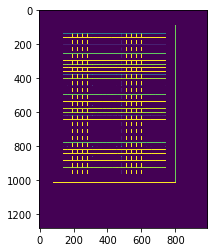

In [82]:
plt.imshow(img_bin)

In [83]:
# Defining a kernel length
kernel_length = np.array(img).shape[1]//80
 
# A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 3))

In [84]:
# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=2)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=2)
cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=2)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=2)
cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)

True

In [86]:
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.1)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 127,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("img_final_bin1.jpg",img_final_bin)

True

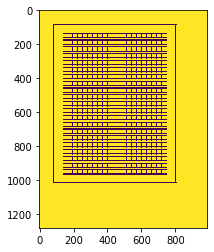

In [89]:
plt.imshow(img_final_bin)
plt.show()

In [134]:
import cv2

#Load the image in black and white (0 - b/w, 1 - color).
# Read the image
img = cv2.imread('C:\\Users\\MANDY\\Desktop\\capstone\\edge.png', 0)
# img = cv2.imread('input.png', 0)

#Get the height and width of the image.
h, w = img.shape[:2]

#Invert the image to be white on black for compatibility with findContours function.
imgray = 255 - img
#Binarize the image and call it thresh.
ret, thresh = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)

#Find all the contours in thresh. In your case the 3 and the additional strike
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
#Calculate bounding rectangles for each contour.
rects = [cv2.boundingRect(cnt) for cnt in contours]

# #Calculate the combined bounding rectangle points.
# top_x = min([x for (x, y, w, h) in rects])
# top_y = min([y for (x, y, w, h) in rects])
# bottom_x = max([x+w for (x, y, w, h) in rects])
# bottom_y = max([y+h for (x, y, w, h) in rects])

# #Draw the rectangle on the image
# out = cv2.rectangle(img, (top_x, top_y), (bottom_x, bottom_y), (0, 255, 0), 2)
# #Save it as out.jpg
# cv2.imwrite('out.jpg', img)

In [92]:
len(rects)

464

In [135]:
count=0
for i in rects:
    try:
        x=i[0]
        y=i[1]
        w=i[2]
        h=i[3]
        #if (w>33 and w<37 and h>27 and h <31):
            #print(i)
        cv2.imwrite("..\\result\\subz"+str(count)+".png",img[x:x+w,y:y+h])
        count+=1
    except:
        continue

In [103]:
os.getcwd()

'C:\\Users\\MANDY\\Desktop\\capstone'

In [131]:
import cv2

def edge_detect(file_name, tresh_min, tresh_max):
    image = cv2.imread(file_name)
    im_bw = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    (thresh, im_bw) = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    cv2.imwrite('bw_'+file_name, im_bw)

    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(image, contours, 1, (0,255,0), 3)
    cv2.imwrite('cnt_'+file_name, image)

if __name__ == '__main__':
    edge_detect('edge.jpeg', 128, 255)

In [132]:
cv2.imwrite("..\\result\\subx"+str(count)+".jpg",img[x:x+w,y:y+h])

True

In [124]:
import cv2

def bw_scale(file_name, tresh_min, tresh_max):
    image = cv2.imread(file_name)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    (thresh, im_bw) = cv2.threshold(image, tresh_min, tresh_max, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    (thresh, im_bw) = cv2.threshold(image, tresh_min, tresh_max, 0)

    cv2.imwrite('bw_'+file_name, im_bw)
    return (thresh, im_bw)

def edge_detect(file_name, tresh_min, tresh_max):
    (thresh, im_bw) = bw_scale(file_name, tresh_min, tresh_max)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


if __name__ == '__main__':
    edge_detect('edge.jpeg', 128, 255)

In [136]:
import PyPDF2
pdf_file = open('edge.pdf', 'rb')
read_pdf = PyPDF2.PdfFileReader(pdf_file)
number_of_pages = read_pdf.getNumPages()
page = read_pdf.getPage(0)
page_content = page.extractText()
print page_content.encode('utf-8')

SyntaxError: invalid syntax (<ipython-input-136-832d93189f21>, line 7)

In [138]:
pip install pypdf2

  Created wheel for pypdf2: filename=PyPDF2-1.26.0-cp37-none-any.whl size=61091 sha256=df5597067496465e05d23b7972d57aa8b1333bbf7c7a154fdbe7314bc4aa4ab4
  Stored in directory: C:\Users\MANDY\AppData\Local\pip\Cache\wheels\53\84\19\35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built pypdf2
Note: you may need to restart the kernel to use updated packages.


In [144]:
# importing required modules
import PyPDF2

# creating a pdf file object
pdfFileObj = open('edge5.pdf', 'rb')

# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

# printing number of pages in pdf file
print(pdfReader.numPages)

# creating a page object
pageObj = pdfReader.getPage(0)

# extracting text from page
print(pageObj.extractText())

# closing the pdf file object
pdfFileObj.close()

1
Scanned by CamScanner
